<a href="https://colab.research.google.com/github/deepeshsingh19/pomegranate_normalcy_DL/blob/main/DLproject_pomegranate_normalcy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch
!pip install torchvision
!pip install tensorflow

In [ ]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.utils import plot_model
import matplotlib.pyplot as plt

In [ ]:
# Define hyperparameters
learning_rate = 0.001
batch_size = 32
img_size = (255, 255)
epochs = 50
dropout_rate=0.3

In [ ]:
# Define data path
data_dir = '/content/drive/My Drive/PomegranateNormalAbnormalTrain/'

# Image preprocessing configuration
datagen = ImageDataGenerator(
    rescale=1./255
)

# Load and preprocess the entire dataset
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Set up data preprocessing for the test dataset
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    '/content/drive/My Drive/PomegranateNormalAbnormalTest/',  # Replace with the path to your test data
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 2405 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


## MODELS

In [ ]:
# Create the CNN model - TEST CONFIG 4 MODIFIED WITH CONFIG 1 BEST CONFIG SO FAR (included BN and Dropout after each layer)
model = Sequential([
    Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=(255,255,3)), #popular activation layer for hidden layer is relu
    MaxPooling2D((2, 2)),                                     #inorder to preserve the features and reduce the size
    Dropout(dropout_rate),
    BatchNormalization(),
    Conv2D(64,  kernel_size = (3,3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(dropout_rate),
    BatchNormalization(),
    Conv2D(64,  kernel_size = (3,3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(dropout_rate),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(dropout_rate),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(dropout_rate),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(dropout_rate),
    BatchNormalization(),
    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),                    #for hidden layer
    Dense(2, activation='softmax'),          #softmax will normalize the probability of the classes
])

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Continued

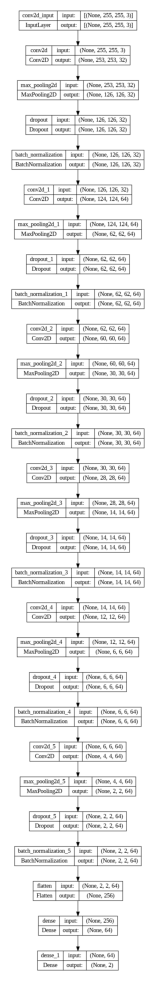

In [ ]:
#Visualize the model architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Display the plot
img = plt.imread('model_plot.png')
plt.figure(figsize=(12.5, 12.5))
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
#Train the CNN model - INSTANCE 1
history = model.fit(
    train_data,
    epochs=epochs,
    validation_data=test_data  # Specify the validation data
)
# Save the model
model.save('/content/drive/My Drive/fruit_model.h5')

Epoch 1/50
76/76 [==============================] - 1728s 23s/step - loss: 0.9747 - accuracy: 0.9114 - val_loss: 1.3266 - val_accuracy: 0.5000
Epoch 2/50
76/76 [==============================] - 176s 2s/step - loss: 0.4155 - accuracy: 0.9717 - val_loss: 1.2772 - val_accuracy: 0.5000
Epoch 3/50
76/76 [==============================] - 184s 2s/step - loss: 0.2077 - accuracy: 0.9780 - val_loss: 1.2938 - val_accuracy: 0.5000
Epoch 4/50
76/76 [==============================] - 172s 2s/step - loss: 0.1223 - accuracy: 0.9817 - val_loss: 0.6520 - val_accuracy: 0.6217
Epoch 5/50
76/76 [==============================] - 165s 2s/step - loss: 0.0821 - accuracy: 0.9846 - val_loss: 1.6648 - val_accuracy: 0.5050
Epoch 6/50
76/76 [==============================] - 163s 2s/step - loss: 0.0734 - accuracy: 0.9867 - val_loss: 0.5612 - val_accuracy: 0.7517
Epoch 7/50
76/76 [==============================] - 171s 2s/step - loss: 0.0841 - accuracy: 0.9817 - val_loss: 0.0484 - val_accuracy: 0.9967
Epoch 8/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Resume training from previous last epoch
history = model.fit(train_data, epochs=100, validation_data=test_data, initial_epoch=78)

In [ ]:
# Extract the desired variable names for plotting
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

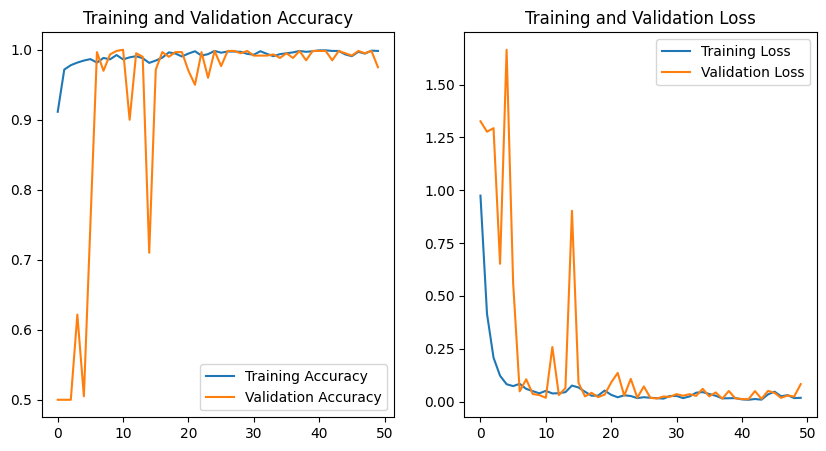

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

# Load the trained model
model = load_model('/content/drive/My Drive/fruit_model.h5')

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_data, verbose=2)
print(f'Training Loss: {loss[-1] * 100}%')
print(f'Training Accuracy: {acc[-1] * 100}%')
print(f'Validation Loss: {test_loss * 100}%')
print(f'Validation Accuracy: {test_accuracy * 100}%')

19/19 - 33s - loss: 0.0826 - accuracy: 0.9750 - 33s/epoch - 2s/step
Training Loss: 1.7775148153305054%
Training Accuracy: 99.83367919921875%
Validation Loss: 8.259478211402893%
Validation Accuracy: 97.50000238418579%


In [ ]:
#Number of Trainable Parameters
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 253, 253, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 126, 126, 32)      0         
                                                                 
 batch_normalization (Batch  (None, 126, 126, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0

## Predict For Test Input Image

In [ ]:
#Define class names
class_names = ["Abnormal", "Normal"]

In [ ]:
#Running prediction on sample image
import numpy as np
for images_batch, labels_batch in test_data.take(1):

  first_image = images_batch[0].numpy().astype('uint8')
  first_label = labels_batch[0].numpy()

  print("First Image to Predict:")
  plt.imshow(first_image)
  print("Actual Label: ", class_names[first_label])

  batch_prediction = model.predict(images_batch)
  print("Predicted Label: ", class_names[np.argmax(batch_prediction[0])])
  plt.axis("off")

In [ ]:
#Function for inference
def predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array, 0)

  predictions = model.predict(img_array)

  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100*(np.max(predictions[0])), 2)
  return predicted_class, confidence

In [ ]:
#Running inference on few sample images
plt.figure(figsize = (15,15))
for images, labels in test_data.take(1):
  for i in range(5):
    ax = plt.subplot(5,5, i+1)
    plt.imshow(images[i].numpy().astype('uint8'))

    predicted_class, confidence = predict(model, images[i].numpy())
    actual_class = class_names[labels[i]]

    plt.title(f"Actual: {actual_class}, \nPredicted: {predicted_class}.\nConfidence: {confidence}%")
    plt.axis("off")

Saving IMG_20230903_121344.jpg to IMG_20230903_121344.jpg
1/1 [==============================] - 0s 306ms/step


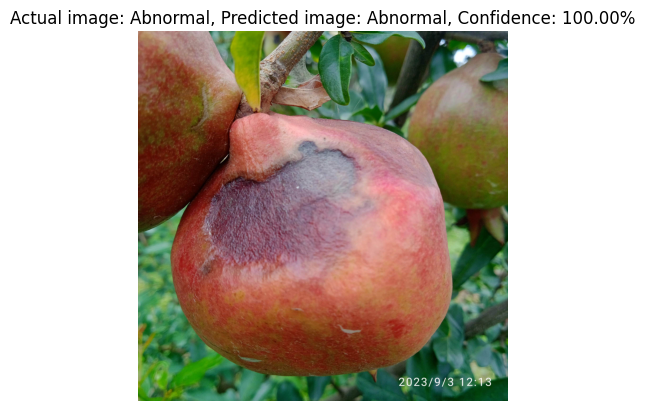

In [ ]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Function to upload an image
def upload_image():
    from google.colab import files
    uploaded = files.upload()
    for filename in uploaded.keys():
        return filename, uploaded[filename]

# Load the trained model
model = load_model('/content/drive/My Drive/fruit_model.h5')

# Make predictions on the uploaded image
image_path, image_content = upload_image()
img = image.load_img(image_path, target_size=(255, 255))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0  # Normalize the image

predictions = model.predict(img)
predicted_class = np.argmax(predictions)

# Map class index to fruit name (replace with your own mapping)
class_names = ["Abnormal", "Normal"]
predicted_condition = class_names[predicted_class]

# Display the uploaded image and the predicted fruit
plt.imshow(plt.imread(image_path))
plt.title(f'Actual image: Abnormal, Predicted image: {predicted_condition}, Confidence: {predictions[0][predicted_class] * 100:.2f}%')
plt.axis('off')
plt.show()
